In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
airline_safety = pd.read_csv("/kaggle/input/fivethirtyeight-airline-safety-dataset/airline-safety.csv")
airline_safety.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


*The dataset contains 56 entries of 8 features. Except for the 'airline' which is categorical, the remaining are integers*

In [3]:
airline_safety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
airline                   56 non-null object
avail_seat_km_per_week    56 non-null int64
incidents_85_99           56 non-null int64
fatal_accidents_85_99     56 non-null int64
fatalities_85_99          56 non-null int64
incidents_00_14           56 non-null int64
fatal_accidents_00_14     56 non-null int64
fatalities_00_14          56 non-null int64
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


The average incidents between 1985-1999 is 7, the average fatal accidents in those years is 2 and average fatalities is 112.
The average incidents between 2000-2014 is 4 and the average fatal accidents in those years is less than 1 and average fatalities is 55

In [4]:
airline_safety.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


The different unique values of each features can be seen 

In [5]:
airline_safety.nunique()

airline                   56
avail_seat_km_per_week    56
incidents_85_99           19
fatal_accidents_85_99     11
fatalities_85_99          38
incidents_00_14           14
fatal_accidents_00_14      4
fatalities_00_14          23
dtype: int64

*No missing values in our dataset!*

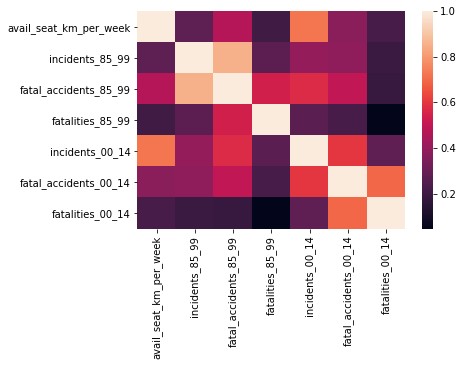

In [6]:
sns.heatmap(airline_safety.corr());

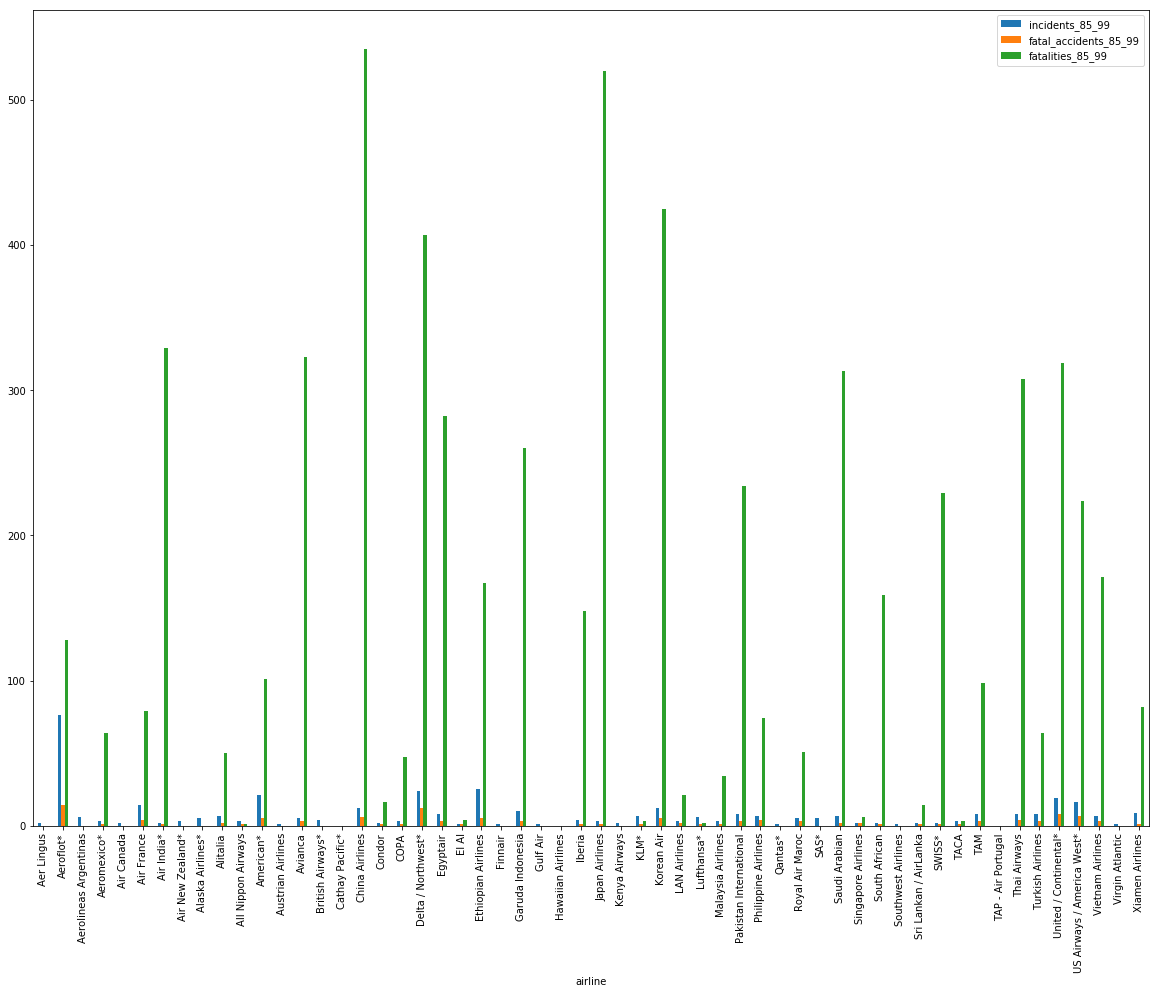

In [7]:
airline_safety.plot(x = 'airline',y=['incidents_85_99','fatal_accidents_85_99','fatalities_85_99'],kind='bar',figsize=(20,15));
plt.show()

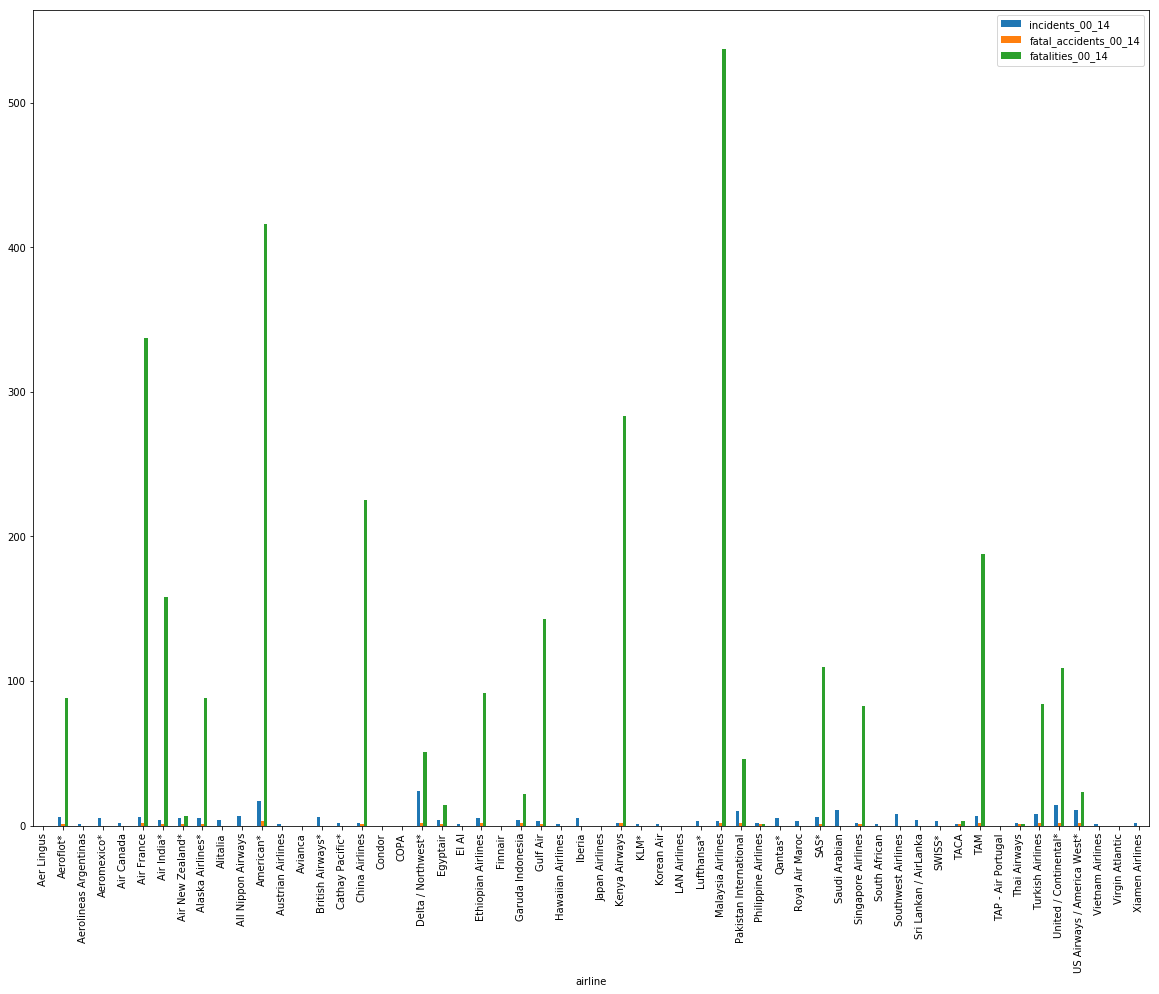

In [8]:

airline_safety.plot(x = 'airline',y=['incidents_00_14','fatal_accidents_00_14','fatalities_00_14'],kind='bar',figsize=(20,15));
plt.show()

The above plot was not very much informative

In [9]:
incidents8599 = pd.cut(airline_safety['incidents_85_99'],bins=[0,5,10,20,50,100],labels=['0-5','5-10','10-20','20-50','50-100'])
incidents0014 = pd.cut(airline_safety['incidents_00_14'],bins=[0,5,10,20,50,100],labels=['0-5','5-10','10-20','20-50','50-100'])

print("Incidents between 1985-1999\n",incidents8599.value_counts())
print("Incidents between 2000-2014\n",incidents0014.value_counts())

Incidents between 1985-1999
 0-5       30
5-10      14
10-20      5
20-50      3
50-100     1
Name: incidents_85_99, dtype: int64
Incidents between 2000-2014
 0-5       33
5-10       9
10-20      4
20-50      1
50-100     0
Name: incidents_00_14, dtype: int64


In [10]:
fatal_accidents8599 = pd.cut(airline_safety['fatal_accidents_85_99'],bins=[0,5,10,20,50,100],labels=['0-5','5-10','10-20','20-50','50-100'])
fatal_accidents0014 = pd.cut(airline_safety['fatal_accidents_00_14'],bins=[0,5,10,20,50,100],labels=['0-5','5-10','10-20','20-50','50-100'])

print("Fatal accidents between 1985-1999")
print(fatal_accidents8599.value_counts())
print("\nFatal accidents between 2000-2014")
print(fatal_accidents0014.value_counts())

Fatal accidents between 1985-1999
0-5       34
5-10       3
10-20      2
50-100     0
20-50      0
Name: fatal_accidents_85_99, dtype: int64

Fatal accidents between 2000-2014
0-5       24
50-100     0
20-50      0
10-20      0
5-10       0
Name: fatal_accidents_00_14, dtype: int64


In [11]:
fatalities8599 = pd.cut(airline_safety['fatalities_85_99'],bins=[0,25,50,100,200,500,800],labels=['0-25','25-50','50-100','100-200','200-500','500-800'])
fatalities0014 = pd.cut(airline_safety['fatalities_00_14'],bins=[0,25,50,100,200,500,800],labels=['0-25','25-50','50-100','100-200','200-500','500-800'])

print("Fatalities between 1985-1999")
print(fatalities8599.value_counts())
print("\nFatalities between 2000-2014")
print(fatalities0014.value_counts())

Fatalities between 1985-1999
200-500    12
0-25        9
50-100      7
100-200     6
25-50       3
500-800     2
Name: fatalities_85_99, dtype: int64

Fatalities between 2000-2014
0-25       7
50-100     6
100-200    5
200-500    4
500-800    1
25-50      1
Name: fatalities_00_14, dtype: int64


In [12]:
m = airline_safety['incidents_85_99'].max()
n = airline_safety['incidents_85_99'].min()

print("Airline with maximum incidents between 1985-1999")
print(airline_safety[airline_safety['incidents_85_99'] == m]['airline'].values)
print("\nAirline with minimum incidents between 1985-1999")
print(airline_safety[airline_safety['incidents_85_99'] == n]['airline'].values)
print('\n')

m = airline_safety['fatal_accidents_85_99'].max()
n = airline_safety['fatal_accidents_85_99'].min()

print("Airline with maximum fatal accidents between 1985-1999")
print(airline_safety[airline_safety['fatal_accidents_85_99'] == m]['airline'].values)
print("\nAirline with minimum fatal accidents between 1985-1999")
print(airline_safety[airline_safety['incidents_85_99'] == n]['airline'].values)
print('\n')

m = airline_safety['fatalities_85_99'].max()
n = airline_safety['fatalities_85_99'].min()

print("Airline with maximum fatalities between 1985-1999")
print(airline_safety[airline_safety['fatalities_85_99'] == m]['airline'].values)
print("\nAirline with minimum fatalities between 1985-1999")
print(airline_safety[airline_safety['fatalities_85_99'] == n]['airline'].values)
print('\n')

Airline with maximum incidents between 1985-1999
['Aeroflot*']

Airline with minimum incidents between 1985-1999
['Cathay Pacific*' 'Hawaiian Airlines' 'TAP - Air Portugal']


Airline with maximum fatal accidents between 1985-1999
['Aeroflot*']

Airline with minimum fatal accidents between 1985-1999
['Cathay Pacific*' 'Hawaiian Airlines' 'TAP - Air Portugal']


Airline with maximum fatalities between 1985-1999
['China Airlines']

Airline with minimum fatalities between 1985-1999
['Aer Lingus' 'Aerolineas Argentinas' 'Air Canada' 'Air New Zealand*'
 'Alaska Airlines*' 'Austrian Airlines' 'British Airways*'
 'Cathay Pacific*' 'Finnair' 'Gulf Air' 'Hawaiian Airlines'
 'Kenya Airways' 'Qantas*' 'SAS*' 'Southwest Airlines'
 'TAP - Air Portugal' 'Virgin Atlantic']




In [13]:
m = airline_safety['incidents_00_14'].max()
n = airline_safety['incidents_00_14'].min()

print("Airline with maximum incidents between 2000-2014")
print(airline_safety[airline_safety['incidents_00_14'] == m]['airline'].values)
print("\nAirline with minimum incidents between 2000-2014")
print(airline_safety[airline_safety['incidents_00_14'] == n]['airline'].values)
print('\n')

m = airline_safety['fatal_accidents_00_14'].max()
n = airline_safety['fatal_accidents_00_14'].min()

print("Airline with maximum fatal accidents between 2000-2014")
print(airline_safety[airline_safety['fatal_accidents_00_14'] == m]['airline'].values)
print("\nAirline with minimum fatal accidents between 2000-2014")
print(airline_safety[airline_safety['incidents_00_14'] == n]['airline'].values)
print('\n')

m = airline_safety['fatalities_00_14'].max()
n = airline_safety['fatalities_00_14'].min()

print("Airline with maximum fatalities between 2000-2014")
print(airline_safety[airline_safety['fatalities_00_14'] == m]['airline'].values)
print("\nAirline with minimum fatalities between 2000-2014")
print(airline_safety[airline_safety['fatalities_00_14'] == n]['airline'].values)
print('\n')

Airline with maximum incidents between 2000-2014
['Delta / Northwest*']

Airline with minimum incidents between 2000-2014
['Aer Lingus' 'Avianca' 'Condor' 'COPA' 'Finnair' 'Japan Airlines'
 'LAN Airlines' 'TAP - Air Portugal' 'Virgin Atlantic']


Airline with maximum fatal accidents between 2000-2014
['American*']

Airline with minimum fatal accidents between 2000-2014
['Aer Lingus' 'Avianca' 'Condor' 'COPA' 'Finnair' 'Japan Airlines'
 'LAN Airlines' 'TAP - Air Portugal' 'Virgin Atlantic']


Airline with maximum fatalities between 2000-2014
['Malaysia Airlines']

Airline with minimum fatalities between 2000-2014
['Aer Lingus' 'Aerolineas Argentinas' 'Aeromexico*' 'Air Canada'
 'Alitalia' 'All Nippon Airways' 'Austrian Airlines' 'Avianca'
 'British Airways*' 'Cathay Pacific*' 'Condor' 'COPA' 'El Al' 'Finnair'
 'Hawaiian Airlines' 'Iberia' 'Japan Airlines' 'KLM*' 'Korean Air'
 'LAN Airlines' 'Lufthansa*' 'Qantas*' 'Royal Air Maroc' 'Saudi Arabian'
 'South African' 'Southwest Airlines' 'S

In [14]:
year_85_99 = airline_safety[['airline','avail_seat_km_per_week','incidents_85_99','fatal_accidents_85_99','fatalities_85_99']]
year_00_14 = airline_safety[['airline','avail_seat_km_per_week','incidents_00_14','fatal_accidents_00_14','fatalities_00_14']]

In [15]:
fig = go.Figure(data=[go.Table(
    header=dict(values=year_85_99.columns,
                line_color='darkslategray',
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[year_85_99['airline'],year_85_99['avail_seat_km_per_week'],year_85_99['incidents_85_99'],year_85_99['fatal_accidents_85_99'],year_85_99['fatalities_85_99']], # 2nd column
               line_color='darkslategray',
               fill_color='lavender',
               align='left'))
])

fig.show()

In [16]:
fig = go.Figure(data=[go.Table(
    header=dict(values=year_00_14.columns,
                line_color='darkslategray',
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[year_00_14['airline'],year_00_14['avail_seat_km_per_week'],year_00_14['incidents_00_14'],year_00_14['fatal_accidents_00_14'],year_00_14['fatalities_00_14']], # 2nd column
               line_color='darkslategray',
               fill_color='lavender',
               align='left'))
])

fig.show()

In [17]:
print("Enter the airline you want to check")
#user_input = input()
user_input = 'american'
user_input = user_input.lower()

data= airline_safety[airline_safety["airline"].map(lambda x: x.lower().strip('*')) == user_input]

if data.empty:
    print("Please enter the airlines correctly")
else:
    print("\nAvailable Seats Km per week ->" ,data.avail_seat_km_per_week.values)
    print("\nIncidents between       1985-1999 ->",data.incidents_85_99.values)
    print("\nFatal accidents between 1985-1999 ->",data.fatal_accidents_85_99.values)
    print("\nFatalities between      1985-1999 ->",data.fatalities_85_99.values)
    print("\nIncidents between       2000 - 2014 ->",data.incidents_00_14.values)
    print("\nFatal accidents between 2000 - 2014 ->",data.fatal_accidents_00_14.values)
    print("\nFatalities between      2000 - 2014 ->",data.fatalities_00_14.values)

Enter the airline you want to check

Available Seats Km per week -> [5228357340]

Incidents between       1985-1999 -> [21]

Fatal accidents between 1985-1999 -> [5]

Fatalities between      1985-1999 -> [101]

Incidents between       2000 - 2014 -> [17]

Fatal accidents between 2000 - 2014 -> [3]

Fatalities between      2000 - 2014 -> [416]
